In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# input params
all_possible_state = [0,1] # 0 = Sunny, 1 = Rainy

# actual transition prob. matrix and initial prob. vector
def trans_init_table():
    """
        row | col
        Xn | Xn+1
        i | j
        t-1 | t
    """
    act_trans_prob = np.array([[0.9,0.1],[0.1,0.9]])
    
    """
        row
        t=0
        0 : P(Sunny t=0)
        1 : P(Rainy t=0)
    """
    act_init_prob = np.array([0.5,0.5])

    return act_trans_prob,act_init_prob

# sequence generator
def sequence_generator(act_trans_prob,act_init_prob,num_time_steps,num_sequences):

    all_sequences = []

    for i in range(0,num_sequences):
        each_sequence = []

        for j in range(0,num_time_steps):
            random_num = np.random.uniform()

            # if 1st state
            if j == 0:
                if random_num < act_init_prob[0]:
                    each_sequence.append(0) # 0 = Sunny
                else:
                    each_sequence.append(1) # 1 = Rainy
            # if not 1st state
            else:
                current_state = each_sequence[j-1]
                
                if random_num < np.amin(act_trans_prob[current_state,:]):
                    each_sequence.append(np.argmin(act_trans_prob[current_state,:]))
                else:
                    each_sequence.append(np.argmax(act_trans_prob[current_state,:]))
        
        all_sequences.append(each_sequence)

    return all_sequences

# estimated transition prob. matrix
def transition_prob_estimator(all_sequences):
    est_trans_prob = np.zeros((2,2))

    for row in range(est_trans_prob.shape[0]): # previose state
        for col in range(est_trans_prob.shape[1]): # future state
            target_transition = [row,col]

            # converting 2 time steps for each seq
            for each_step in range(1,len(all_sequences)):
                this_transition = np.array(all_sequences)[:,[each_step-1,each_step]].tolist()

                for each_seq in this_transition:
                    if each_seq == target_transition:
                        est_trans_prob[row,col] += 1
            
            # sum up to 1
            est_trans_prob[row,col] /= len(np.argwhere(np.array(all_sequences)[:,:-1] == row))
    
    return est_trans_prob

# estimated initial prob. vector
def initial_prob_estimator(all_sequences):
    init_seq = np.array(all_sequences)[:,0]
    est_init_prob = np.zeros((2))

    for i in range(len(all_possible_state)):
        est_init_prob[i] = len(np.argwhere(init_seq == i))

    # sum up to 1
    est_init_prob /= est_init_prob.sum()
    
    return est_init_prob

# predictive function
def prediction(est_trans_prob, train_seq):
    next_state_list = []
    for each_seq in range(num_sequences):
        current_state = train_seq[each_seq][-1]

        next_state = np.argmax(est_trans_prob[current_state,:])
        next_state_list.append(next_state)
    return next_state_list

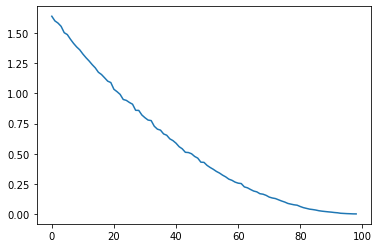

In [4]:
# test: table : SSE
# input params
num_time_steps = 100
act_trans_prob, act_init_prob = trans_init_table()

sse_list = []
for num_sequences in range(1,100):

    # generate data
    all_sequences = sequence_generator(act_trans_prob, act_init_prob, num_time_steps, num_sequences)
    
    # est trans prob table
    est_trans_prob = transition_prob_estimator(all_sequences)

    # measure perform
    SSE = ((act_trans_prob - est_trans_prob)**2).sum()
    sse_list.append(SSE)

# visualise
plt.figure()
plt.plot(sse_list)
plt.show()

In [5]:
# test: table : accuracy
# input params
num_time_steps = 100
num_sequences = 100
act_trans_prob, act_init_prob = trans_init_table()
all_sequences = sequence_generator(act_trans_prob, act_init_prob, num_time_steps, num_sequences)

# train test split
train_seq = np.array(all_sequences)[:,:-1].tolist()
test_seq = np.array(all_sequences)[:,-1]

# estimation
est_trans_prob = transition_prob_estimator(all_sequences)

# predict
pred_seq = prediction(est_trans_prob, train_seq)

# accuracy
print('%acc : ',round((pred_seq == test_seq).sum()/len(test_seq)*100))

%acc :  90
